In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil 

In [2]:
import sys, os

from numpy.lib.arraypad import pad

# get the absolute path to the FUB FVS-Solver
pathname = os.path.dirname(sys.argv[0])
pathname = os.path.abspath(pathname)
FVS_path = pathname.split('FiniteVolumeSolver')[0]+'FiniteVolumeSolver'
# print(FVS_path) 
sys.path.append(FVS_path+'/extra/')
import amrex.plotfiles as da

parent_path = "/home/maikel/Development/FiniteVolumeSolver/build_3D-Release/MultiTube/Slices/"
local_path = "/home/maikel/Development/FiniteVolumeSolver/extra/MultiTube/"
filename = "Plenum.h5"

In [3]:
file = Load(parent_path, local_path, filename)
data  = np.array(file["data"][1000:1277,:,:,:,:])
times = np.array(file["times"][:])
file.close()

In [4]:
print(times.shape)
print(data.shape)
density = data[:,0,:,:,0]
momentum_x = data[:,1,:,:,0]

i = 276

density_i = np.reshape(density[i,:,:], [64, 128])
max_density = np.max(density_i)
momentum_x_i = np.reshape(momentum_x[i,:,:], [64, 128])
velocity_x_i = np.where(density_i > 0, momentum_x_i / density_i, np.nan)

(1318,)
(277, 21, 128, 64, 1)


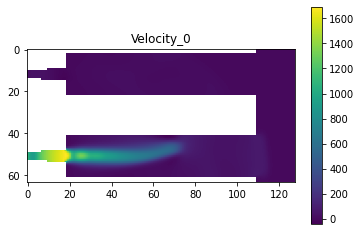

In [45]:
velocity_x_figure = plt.figure()
plt.imshow(velocity_x_i)
plt.colorbar()
plt.title("Velocity_0")
plt.show() 

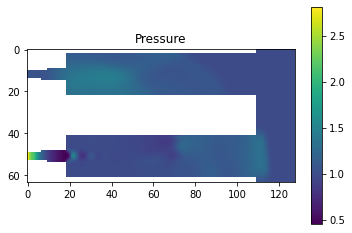

In [48]:
pressure = data[:,20-4,:,:,0]
pressure_i = np.where(density_i > 0.0, np.reshape(pressure[i,:,:], [64, 128]), np.nan) / 101325.0
plt.imshow(pressure_i)
plt.colorbar()
plt.title("Pressure")
plt.show() 

Text(0.5, 1.0, 'Density')

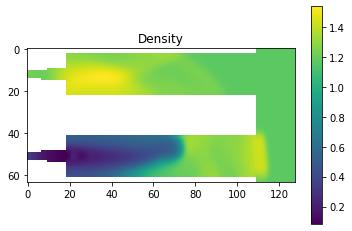

In [49]:
density_i = np.where(density_i > 0, density_i, np.nan)
density_figure = plt.figure()
plt.imshow(density_i)
plt.colorbar()
plt.title("Density")

Make image #000
Make image #001
Make image #002
Make image #003
Make image #004
Make image #005
Make image #006
Make image #007
Make image #008
Make image #009
Make image #010
Make image #011
Make image #012
Make image #013
Make image #014
Make image #015
Make image #016
Make image #017
Make image #018
Make image #019
Make image #020
Make image #021
Make image #022
Make image #023
Make image #024
Make image #025
Make image #026
Make image #027
Make image #028
Make image #029
Make image #030
Make image #031
Make image #032
Make image #033
Make image #034
Make image #035
Make image #036
Make image #037
Make image #038
Make image #039
Make image #040
Make image #041
Make image #042
Make image #043
Make image #044
Make image #045
Make image #046
Make image #047
Make image #048
Make image #049
Make image #050
Make image #051
Make image #052
Make image #053
Make image #054
Make image #055
Make image #056
Make image #057
Make image #058
Make image #059
Make image #060
Make image #061
Make ima

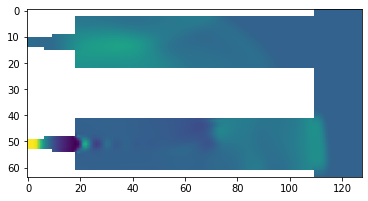

In [15]:
# ***Make a video of Pressure***

fig = plt.figure()
pressure = data[:,20-4,:,:,0]
def MakeImage(i):
    pressure_i = np.where(density_i > 0.0, np.reshape(pressure[i,:,:], [64, 128]), np.nan) / 101325.0
    im = plt.imshow(pressure_i, animated=True)
    return im

ims = []
for i in range(0, 276):
    print("Make image #{:03d}".format(i))
    im = MakeImage(i)
    ims.append([im])

In [14]:
import matplotlib.animation as animation

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani.save("/home/maikel/Development/FiniteVolumeSolver/extra/MultiTube/pressure.mp4")

Traceback (most recent call last):
  File "/home/maikel/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/home/maikel/.local/lib/python3.7/site-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/home/maikel/.local/lib/python3.7/site-packages/matplotlib/animation.py", line 1524, in _init_draw
    for artist in f:
TypeError: 'AxesImage' object is not iterable


TypeError: 'AxesImage' object is not iterable